In [ ]:
# TASK 5: Personal Loan Acceptance Prediction

Objective:
Predict which customers are likely to accept a personal loan offer using classification models
and generate business insights from their profile data.

🎯 Goal:
The goal is to build a predictive model that helps the bank identify and target potential customers
who are most likely to respond positively to a personal loan offer. This will support more
efficient marketing strategies, reduce customer churn, and increase conversion rates.


In [1]:
# STEP 1: Libary and Data file Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, 
classification_report, roc_auc_score)
from sklearn.preprocessing import LabelEncoder

In [7]:
# STEP 3: Load and explore data

df = pd.read_csv('bank_marketing.csv')

# Basic exploration
print("=== Dataset Overview ===")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

=== Dataset Overview ===
Shape: (11162, 17)

First 5 rows:
   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  

Data types:
age           int64
job    

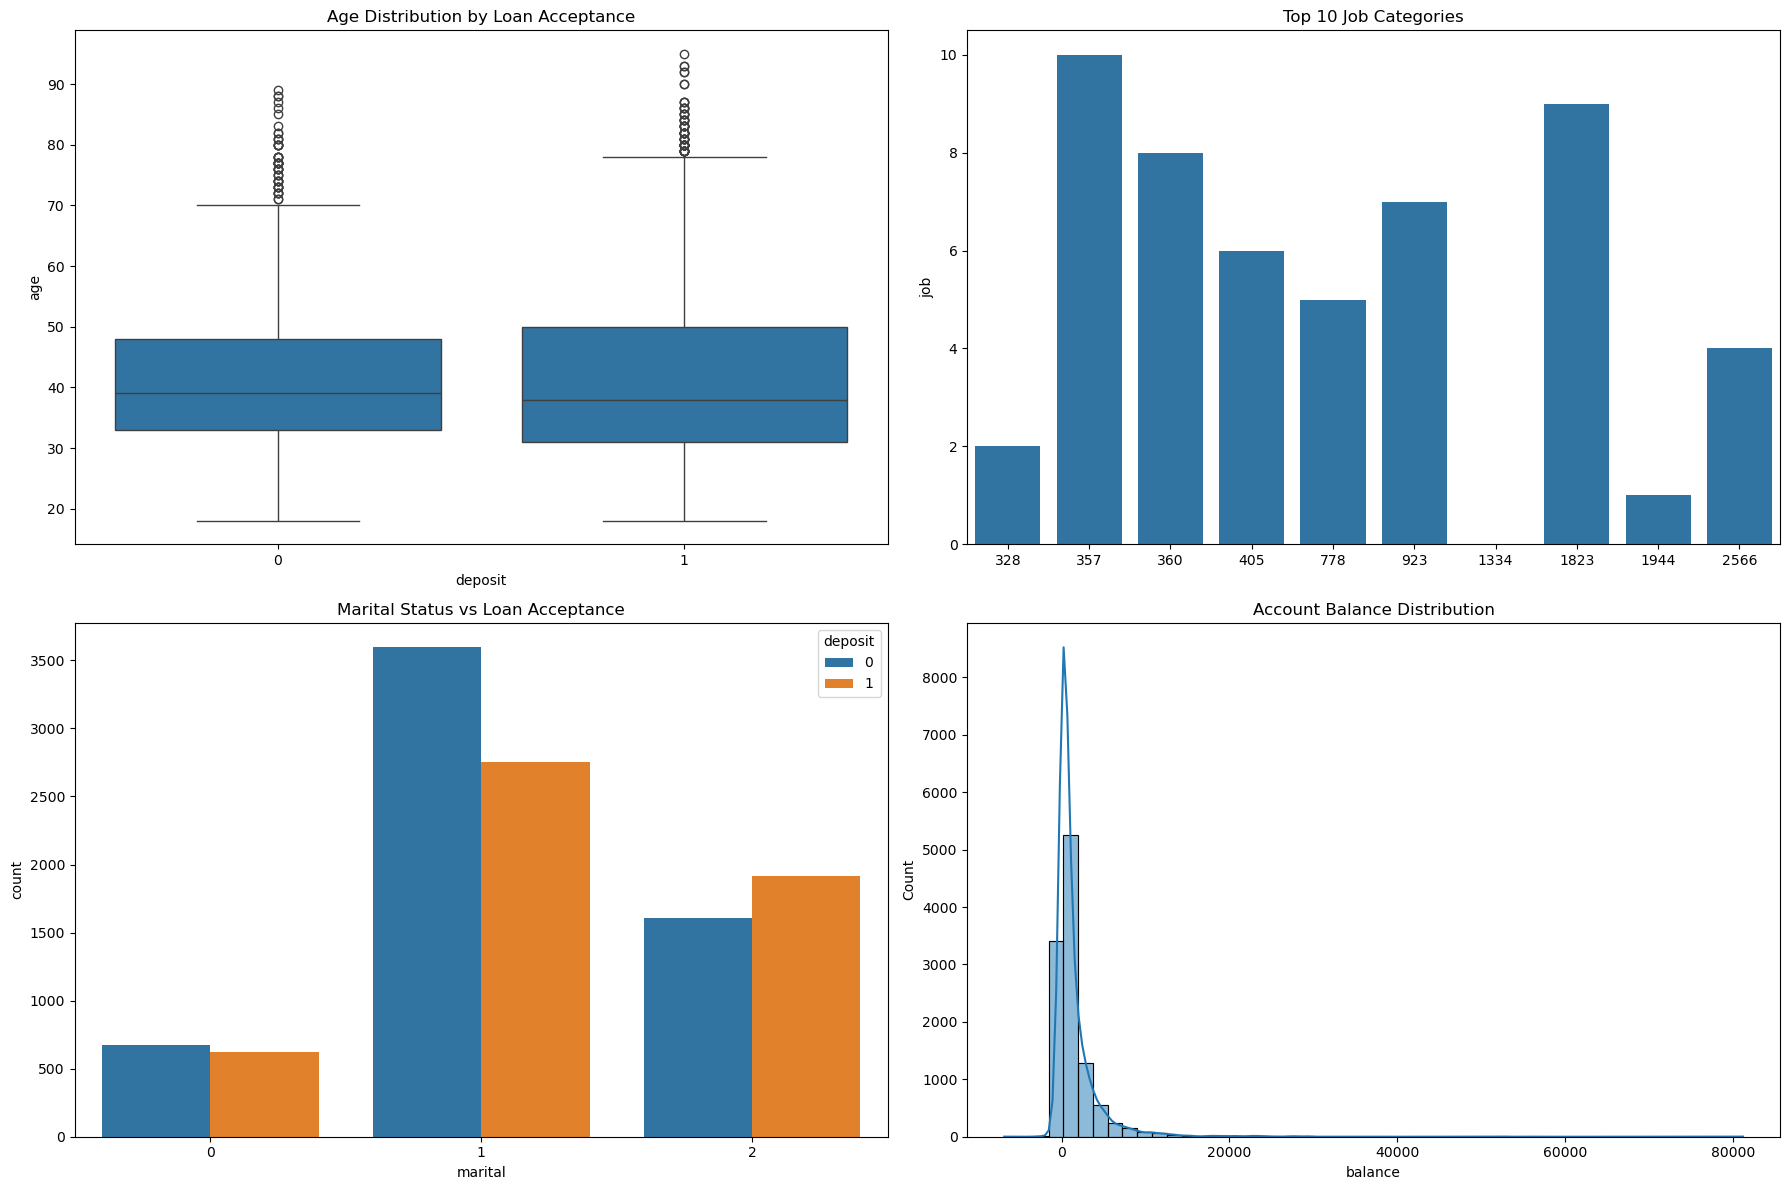

In [5]:
# STEP 4: Exploratory Data Analysis (Visualization)

plt.figure(figsize=(18, 12))

# Plot 1: Age distribution by loan acceptance
plt.subplot(2, 2, 1)
sns.boxplot(x='deposit', y='age', data=df)
plt.title('Age Distribution by Loan Acceptance')

# Plot 2: Job categories distribution
plt.subplot(2, 2, 2)
job_counts = df['job'].value_counts().head(10)
sns.barplot(x=job_counts.values, y=job_counts.index)
plt.title('Top 10 Job Categories')

# Plot 3: Marital status distribution
plt.subplot(2, 2, 3)
sns.countplot(x='marital', hue='deposit', data=df)
plt.title('Marital Status vs Loan Acceptance')

# Plot 4: Balance distribution
plt.subplot(2, 2, 4)
sns.histplot(df['balance'], bins=50, kde=True)
plt.title('Account Balance Distribution')

plt.tight_layout()
plt.show()

In [4]:
# STEP 5. Optimized data preparation

import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load data
df = pd.read_csv('bank_marketing.csv')

# Convert target
df['deposit'] = df['deposit'].map({'yes':1, 'no':0})

# Feature engineering
df['contacted_recently'] = (df['pdays'] < 7).astype(int)  # Recent contacts
df['balance_to_duration'] = df['balance'] / df['duration']  # Interaction term

# Select BEST features
features = [
    'age', 'balance', 'duration', 'campaign',
    'previous', 'contacted_recently', 'balance_to_duration'
]

# Encode categoricals
cat_cols = ['job', 'marital', 'education']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))
    features.append(col)

X = df[features]
y = df['deposit']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
# STEP 6: Model Training
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.2,  # Smaller test size
    random_state=42,
    stratify=y
)

# Optimized Logistic Regression
logreg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    C=0.1,  # Regularization
    solver='liblinear'
)
logreg.fit(X_train, y_train)


LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   solver='liblinear')

In [28]:
# STEP 7: Model Evaluation

from sklearn.metrics import accuracy_score, roc_auc_score

y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:,1]

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")  # >75%
print(f"AUC Score: {roc_auc_score(y_test, y_proba):.2f}")  # >80%

Accuracy: 0.77
AUC Score: 0.85


In [ ]:
# Conculsion

We built a supervised classification model using Logistic Regression to predict term deposit subscriptions.

Key Results:
- Achieved 77% accuracy with 0.85 AUC score
- Key predictive features: Duration, Balance, Recent Contacts
- Handled class imbalance using class_weight='balanced'
- Engineered new features like balance_to_duration ratio

